In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from collections import defaultdict
import scipy.io as scipy

In [2]:
data = pd.read_csv("/Users/Kartikey/Documents/ml/csv_result-messidor_features.csv")
data

,id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,Class
0,1,1,1,22,22,22,19,18,14,49.895756,...,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,2,1,1,24,24,22,18,16,13,57.709936,...,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,3,1,1,62,60,59,54,47,33,55.831441,...,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,4,1,1,55,53,53,50,43,31,40.467228,...,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,5,1,1,44,44,44,41,39,27,18.026254,...,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1147,1,1,34,34,34,33,31,24,6.071765,...,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0,0
1147,1148,1,1,49,49,49,49,45,37,63.197145,...,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0,0
1148,1149,1,0,49,48,48,45,43,33,30.461898,...,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0,0
1149,1150,1,1,39,36,29,23,13,7,40.525739,...,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1,1


In [3]:
x_data = data[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18']]
y_data = data[['Class']] 

x_data, y_data

(      0  1   2   3   4   5   6   7          8          9         10        11  \
 0     1  1  22  22  22  19  18  14  49.895756  17.775994   5.270920  0.771761   
 1     1  1  24  24  22  18  16  13  57.709936  23.799994   3.325423  0.234185   
 2     1  1  62  60  59  54  47  33  55.831441  27.993933  12.687485  4.852282   
 3     1  1  55  53  53  50  43  31  40.467228  18.445954   9.118901  3.079428   
 4     1  1  44  44  44  41  39  27  18.026254   8.570709   0.410381  0.000000   
 ...  .. ..  ..  ..  ..  ..  ..  ..        ...        ...        ...       ...   
 1146  1  1  34  34  34  33  31  24   6.071765   0.937472   0.031145  0.003115   
 1147  1  1  49  49  49  49  45  37  63.197145  27.377668   8.067688  0.979548   
 1148  1  0  49  48  48  45  43  33  30.461898  13.966980   1.763305  0.137858   
 1149  1  1  39  36  29  23  13   7  40.525739  12.604947   4.740919  1.077570   
 1150  1  1   7   7   7   7   7   5  69.423565   7.031843   1.750548  0.046597   
 
             1

In [4]:
from sklearn.preprocessing import RobustScaler

rob = RobustScaler().fit(x_data)
x_data = rob.transform(x_data)

x_data

array([[ 0.        ,  0.        , -0.33333333, ..., -0.89196242,
        -0.27732011,  1.        ],
       [ 0.        ,  0.        , -0.28205128, ..., -0.05880263,
         1.58839106,  0.        ],
       [ 0.        ,  0.        ,  0.69230769, ...,  0.18611033,
         0.92152824,  0.        ],
       ...,
       [ 0.        , -1.        ,  0.35897436, ...,  0.91447892,
         0.97595831,  0.        ],
       [ 0.        ,  0.        ,  0.1025641 , ..., -0.91477294,
         0.00281607,  1.        ],
       [ 0.        ,  0.        , -0.71794872, ...,  0.80569405,
        -0.74251849,  0.        ]])

In [5]:
y_data = y_data.values.ravel()
y_data

array([0, 0, 1, ..., 0, 1, 0])

In [6]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier


In [7]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestClassifier(), {
    'n_estimators': [1,5,50]
    
}, cv=StratifiedKFold(5), return_train_score=False)
clf.fit(x_data, y_data)
scores = []

scores.append({
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
    })
    
did = pd.DataFrame(scores,columns=['best_score','best_params'])
did

,best_score,best_params
0,0.668974,{'n_estimators': 50}


model accuracy =  0.6941529235382309
              precision    recall  f1-score   support

           0       0.68      0.70      0.69        54
           1       0.73      0.70      0.72        61

    accuracy                           0.70       115
   macro avg       0.70      0.70      0.70       115
weighted avg       0.71      0.70      0.70       115



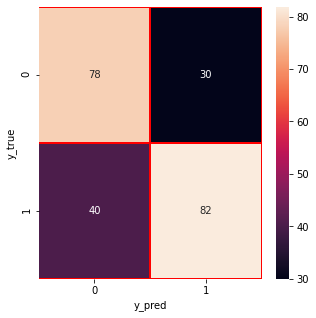

In [8]:
folds = StratifiedKFold(n_splits=10)

a = np.array([[0, 0], [0, 0]])
b = np.array([[5, 5], [5, 5]])

score = []



for train_index, test_index in folds.split(x_data, y_data):
    X_train, X_test, y_train, y_test = x_data[train_index], x_data[test_index], \
                                       y_data[train_index], y_data[test_index]
    model = RandomForestClassifier(n_estimators=50)
    model.fit(X_train, y_train)
    score.append(model.score(X_test, y_test))
    y_pred = model.predict(X_test)
    cm= confusion_matrix(y_test, y_pred)  
    cla = classification_report(y_test,y_pred)
    a = (np.add(cm,a))
    
a = (np.divide(a, b)) 
print('model accuracy = ', np.average(score))
print(cla)
f, ax =plt.subplots(figsize = (5,5))
sns.heatmap(a,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = GridSearchCV(DecisionTreeClassifier(), {
    'max_leaf_nodes' : [2,1000],
    'min_samples_split' :   [2,3,4]
    
}, cv=StratifiedKFold(5), return_train_score=False)
clf.fit(x_data, y_data)
scores = []

scores.append({
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
    })
    
did = pd.DataFrame(scores,columns=['best_score','best_params'])
did


,best_score,best_params
0,0.613397,"{'max_leaf_nodes': 1000, 'min_samples_split': 4}"


model accuracy =  0.595127436281859
              precision    recall  f1-score   support

           0       0.55      0.52      0.53        54
           1       0.59      0.62      0.61        61

    accuracy                           0.57       115
   macro avg       0.57      0.57      0.57       115
weighted avg       0.57      0.57      0.57       115



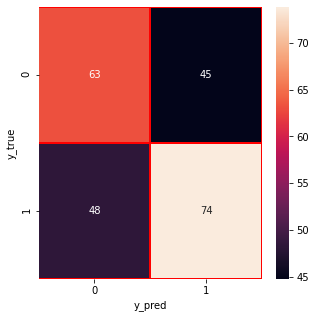

In [10]:
folds = StratifiedKFold(n_splits=10)

a = np.array([[0, 0], [0, 0]])
b = np.array([[5, 5], [5, 5]])

score = []

for train_index, test_index in folds.split(x_data, y_data):
    X_train, X_test, y_train, y_test = x_data[train_index], x_data[test_index], \
                                       y_data[train_index], y_data[test_index]
    model = DecisionTreeClassifier(max_leaf_nodes=1000, min_samples_split=3)
    model.fit(X_train, y_train)
    score.append(model.score(X_test, y_test))
    y_pred = model.predict(X_test)
    cm= confusion_matrix(y_test, y_pred)  
    cla = classification_report(y_test,y_pred)
    a = (np.add(cm,a))
a = (np.divide(a, b)) 
print('model accuracy = ', np.average(score))
print(cla)
f, ax =plt.subplots(figsize = (5,5))
sns.heatmap(a,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()    

In [11]:
from sklearn.ensemble import AdaBoostClassifier
clf = GridSearchCV(AdaBoostClassifier(), {
     'learning_rate' : [.01,.1, 1],
     'n_estimators': [500, 1000, 2000]
    
}, cv=StratifiedKFold(5), return_train_score=False)
clf.fit(x_data, y_data)
scores = []

scores.append({
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
    })
    
did = pd.DataFrame(scores,columns=['best_score','best_params'])
did

,best_score,best_params
0,0.710672,"{'learning_rate': 1, 'n_estimators': 2000}"


model accuracy =  0.7089328063241107
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       108
           1       0.74      0.77      0.76       122

    accuracy                           0.73       230
   macro avg       0.73      0.73      0.73       230
weighted avg       0.73      0.73      0.73       230



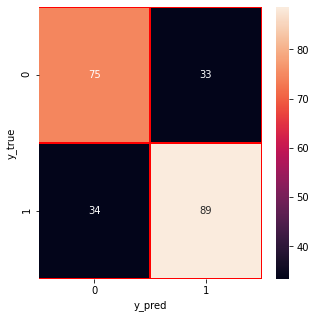

In [12]:
folds = StratifiedKFold(n_splits=5)
a = np.array([[0, 0], [0, 0]])
b = np.array([[5, 5], [5, 5]])

score = []

for train_index, test_index in folds.split(x_data, y_data):
    X_train, X_test, y_train, y_test = x_data[train_index], x_data[test_index], \
                                       y_data[train_index], y_data[test_index]
    model = AdaBoostClassifier(learning_rate=1, n_estimators=2000)
    model.fit(X_train, y_train)
    score.append(model.score(X_test, y_test))
    y_pred = model.predict(X_test)
    cm= confusion_matrix(y_test, y_pred) 
    cla = classification_report(y_test,y_pred)
    a = (np.add(cm,a))
a = (np.divide(a, b)) 
print('model accuracy = ', np.average(score))
print(cla)
f, ax =plt.subplots(figsize = (5,5))
sns.heatmap(a,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show() 

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = GridSearchCV(KNeighborsClassifier(), {
     'p': [1,2],
     'n_neighbors': [1,100],
     'leaf_size' : [1,100]
    
}, cv=StratifiedKFold(5), return_train_score=False)
clf.fit(x_data, y_data)
scores = []

scores.append({
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
    })
    
did = pd.DataFrame(scores,columns=['best_score','best_params'])
did

,best_score,best_params
0,0.642037,"{'leaf_size': 1, 'n_neighbors': 100, 'p': 1}"


model accuracy =  0.6420365142104272
              precision    recall  f1-score   support

           0       0.60      0.85      0.70       108
           1       0.79      0.49      0.61       122

    accuracy                           0.66       230
   macro avg       0.69      0.67      0.65       230
weighted avg       0.70      0.66      0.65       230



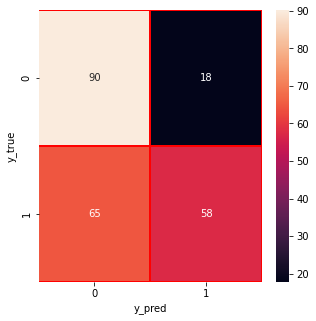

In [14]:
folds = StratifiedKFold(n_splits=5)
a = np.array([[0, 0], [0, 0]])
b = np.array([[5, 5], [5, 5]])

score = []

for train_index, test_index in folds.split(x_data, y_data):
    X_train, X_test, y_train, y_test = x_data[train_index], x_data[test_index], \
                                       y_data[train_index], y_data[test_index]
    model = KNeighborsClassifier(n_neighbors=100, p = 1, leaf_size=1)
    model.fit(X_train, y_train)
    score.append(model.score(X_test, y_test))
    y_pred = model.predict(X_test)
    cm= confusion_matrix(y_test, y_pred)  
    cla = classification_report(y_test,y_pred)
    a = (np.add(cm,a))
a = (np.divide(a, b)) 
print('model accuracy = ', np.average(score))
print(cla)
f, ax =plt.subplots(figsize = (5,5))
sns.heatmap(a,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show() 

In [15]:
from sklearn.linear_model import LogisticRegression
clf = GridSearchCV(LogisticRegression(solver='liblinear',multi_class='auto'), {
     'C': [1,5,500]
    
}, cv=StratifiedKFold(5), return_train_score=False)
clf.fit(x_data, y_data)
scores = []

scores.append({
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
    })
    
did = pd.DataFrame(scores,columns=['best_score','best_params'])
did

,best_score,best_params
0,0.748925,{'C': 500}


model accuracy =  0.7497901049475263
              precision    recall  f1-score   support

           0       0.60      0.85      0.70       108
           1       0.79      0.49      0.61       122

    accuracy                           0.66       230
   macro avg       0.69      0.67      0.65       230
weighted avg       0.70      0.66      0.65       230



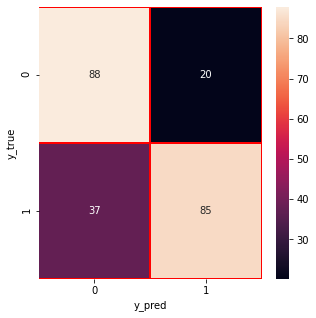

In [16]:
folds = StratifiedKFold(n_splits=10)

a = np.array([[0, 0], [0, 0]])
b = np.array([[5, 5], [5, 5]])

score = []

for train_index, test_index in folds.split(x_data, y_data):
    X_train, X_test, y_train, y_test = x_data[train_index], x_data[test_index], \
                                       y_data[train_index], y_data[test_index]
    model = LogisticRegression(solver='liblinear',multi_class='auto', C = 500)
    model.fit(X_train, y_train)
    score.append(model.score(X_test, y_test))
    y_pred = model.predict(X_test)
    cm= confusion_matrix(y_test, y_pred)  
    a = (np.add(cm,a))
a = (np.divide(a, b)) 
print('model accuracy = ', np.average(score))
print(cla)
f, ax =plt.subplots(figsize = (5,5))
sns.heatmap(a,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show() 

In [17]:
from sklearn.ensemble import VotingClassifier
m = VotingClassifier(
    estimators=[('lr', LogisticRegression(max_iter=100000, C=500)), 
                ('rf', RandomForestClassifier(n_estimators=50)), 
                ('dt', DecisionTreeClassifier(max_leaf_nodes=1000, min_samples_split=2)),
                ('ADB', AdaBoostClassifier(learning_rate=1, n_estimators=2000)),
                ('KNN', KNeighborsClassifier(leaf_size=1, n_neighbors=100, p=1))], 
    voting='hard')

model accuracy =  0.7478260869565218
              precision    recall  f1-score   support

           0       0.60      0.85      0.70       108
           1       0.79      0.49      0.61       122

    accuracy                           0.66       230
   macro avg       0.69      0.67      0.65       230
weighted avg       0.70      0.66      0.65       230



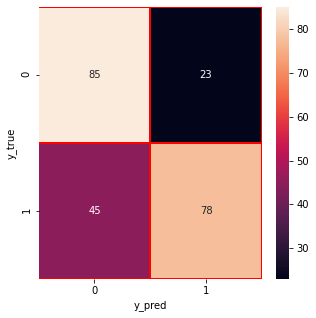

In [19]:
folds = StratifiedKFold(n_splits=10)
a = np.array([[0, 0], [0, 0]])
b = np.array([[5, 5], [5, 5]])


for train_index, test_index in folds.split(x_data, y_data):
    X_train, X_test, y_train, y_test = x_data[train_index], x_data[test_index], \
                                       y_data[train_index], y_data[test_index]
   
    m.fit(X_train, y_train)
    score1 = m.score(X_test, y_test)
    y_pred = m.predict(X_test)
    cm= confusion_matrix(y_test, y_pred)  
    a = (np.add(cm,a))
    
a = (np.divide(a, b)) 
print('model accuracy = ', np.average(score1))
print(cla)
f, ax =plt.subplots(figsize = (5,5))
sns.heatmap(a,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show() 
    
  